# Initial values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../Data/1645792390_cep1_dataset.xlsx')
df = pd.DataFrame(df)

In [4]:
# From the unique value table
num_var = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
cat_var = ['sex', 'cp', 'fast_bsug', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [5]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [6]:
df["thal"] = df["thal"].replace(0, np.nan)
df['thal'].fillna(df["thal"].median(), inplace=True)

In [7]:
cat_axis_name = ["Gender", "Chest Pain", "Fasting Blood Sugar", "resting ECG", "Exercise induced Angina", "Slope of ST Segment", "Number of Blood Vessels", "Thal", "Target"]
num_axis = ['age', 'resting blood pressure', 'cholesterol level', 'thalach', 'oldpeak', 'has CVD']

In [8]:
df.head()

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1


# Scaling Features: 
* comparing catagorical vars and numeric vars range of values need to be scales to relate to eachother.

In [9]:
from sklearn.preprocessing import RobustScaler

In [10]:
robust_scal = RobustScaler()

In [11]:
scaled_data = robust_scal.fit_transform(df[num_var])

In [15]:
df_scaled = pd.DataFrame(scaled_data, columns=num_var)
df_scaled.head()

,age,restbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### num_vars are scaled to similar to eachother; the values have proportionally the same relationship to eachother

### Melt Function: 
* 

In [18]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis=1)
df_new.head()

,age,restbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [20]:
melt_data = pd.melt(df_new, id_vars="target", var_name="variables", value_name="values")
melt_data

,target,variables,values
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


### Swarm plot: show distrubution of features

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

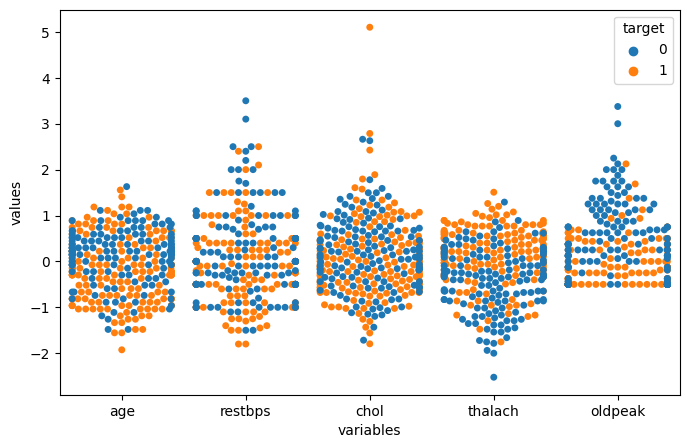

In [21]:
plt.figure(figsize=(8,5))
sns.swarmplot(x = 'variables', y = "values", hue = "target", data = melt_data)
plt.show()

## Numerical Vars - Catagorical Vars with Swarm plot
* More the colors of variable are separated more they are correlated.

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

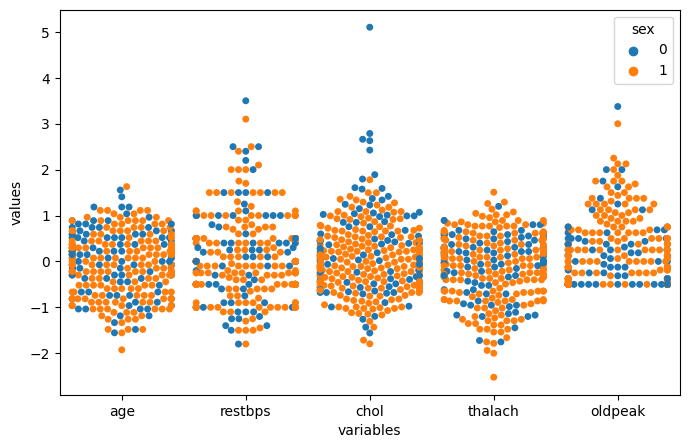

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

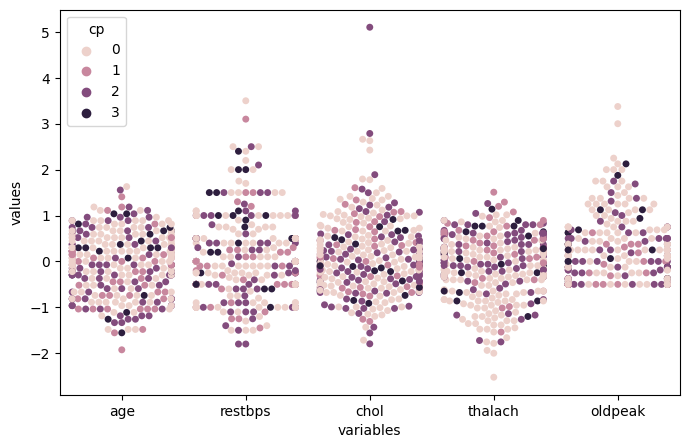

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

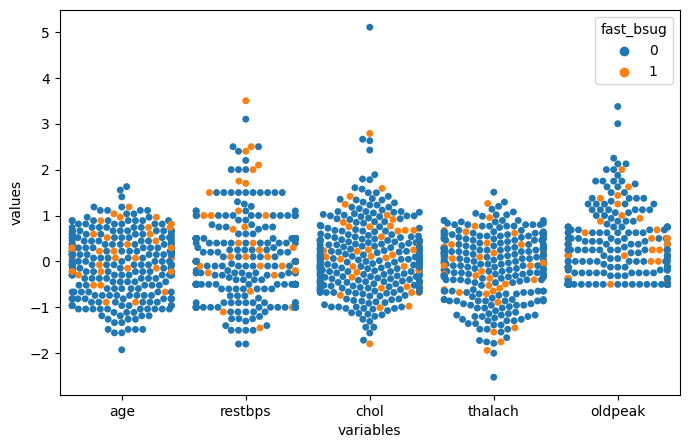

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

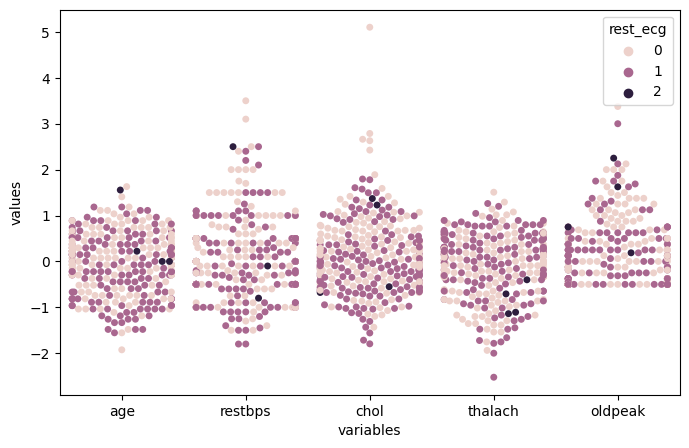

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

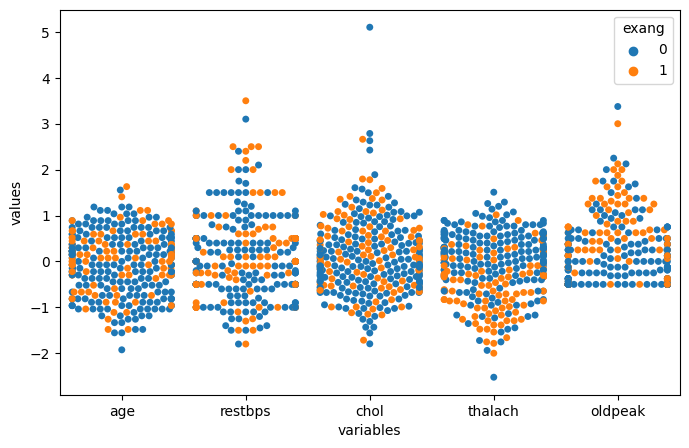

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

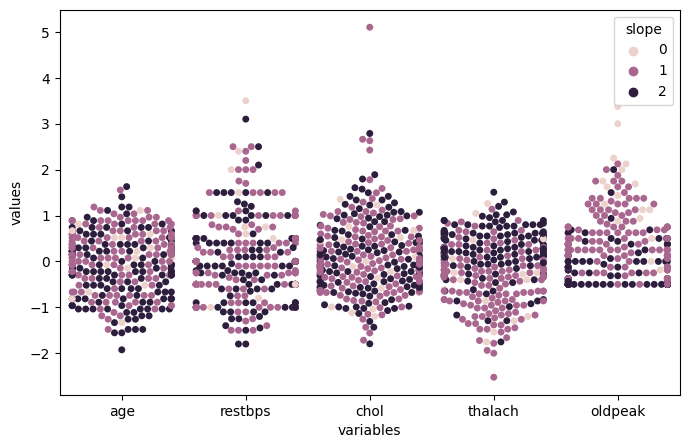

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

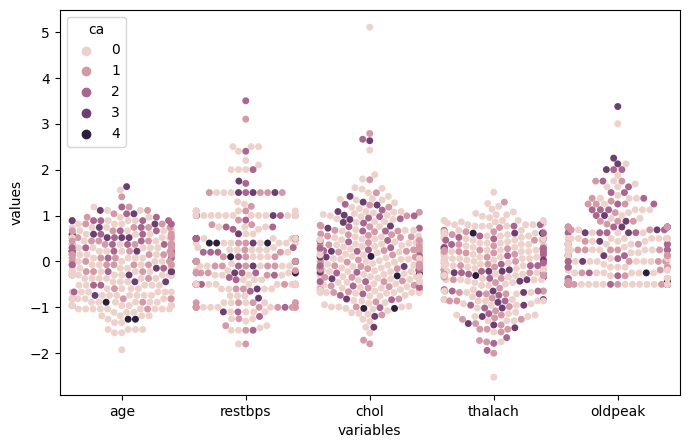

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

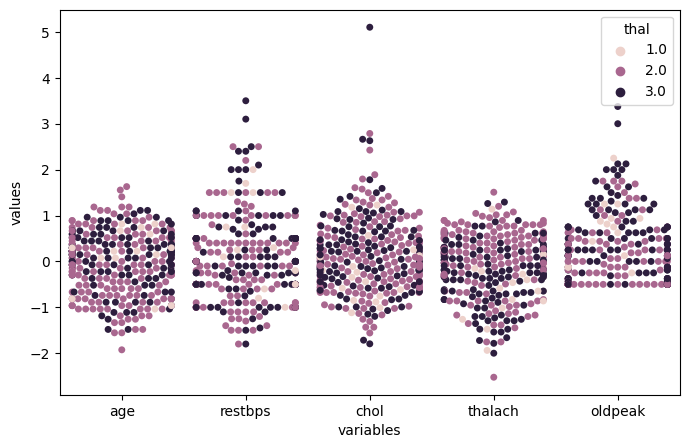

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alvanci

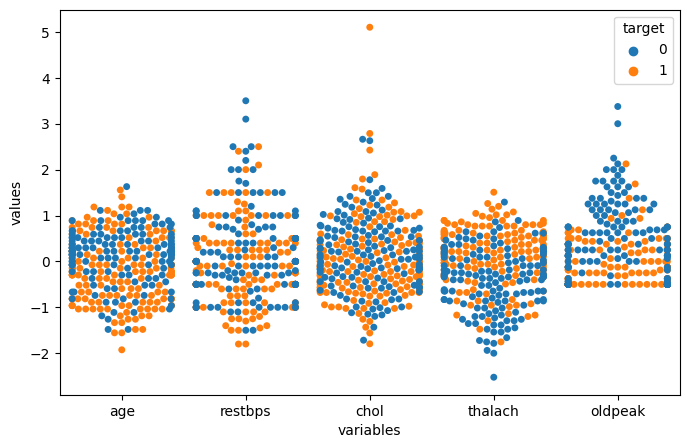

In [23]:
for i in df[cat_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis=1)
    melt_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")

    plt.figure(figsize=(8, 5))
    sns.swarmplot(x="variables", y = "value", hue = i, data=melt_data)

    plt.xlabel("variables")
    plt.ylabel("values")

    plt.show()

## Data Analysis
* Thalach and Oldpeak vars correlate with target, exang, and slope

## BoxPlots
* box is 1st to 3rd quartile
* whiskers are (q1 - 1.5*IQR, q3 + 1.5*IQR)

In [25]:
num_var

['age', 'restbps', 'chol', 'thalach', 'oldpeak']

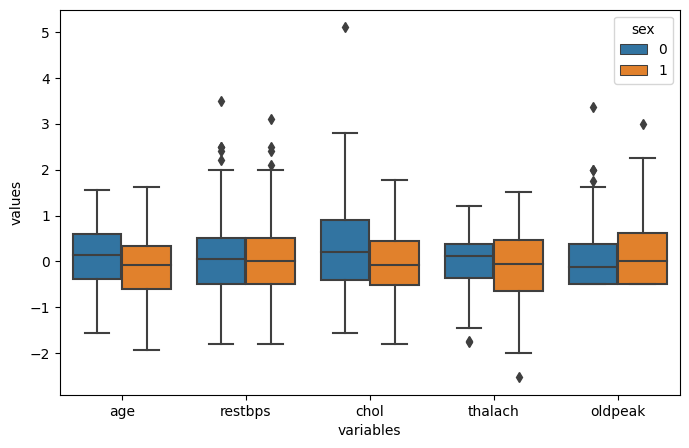

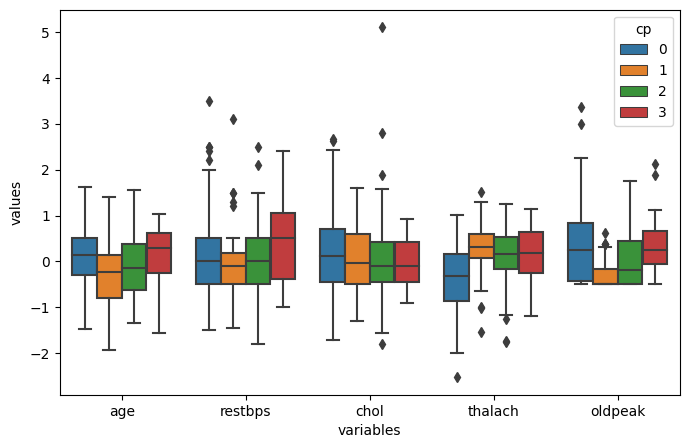

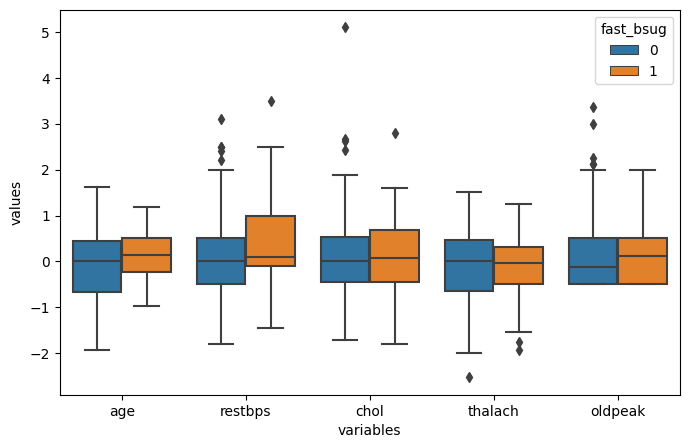

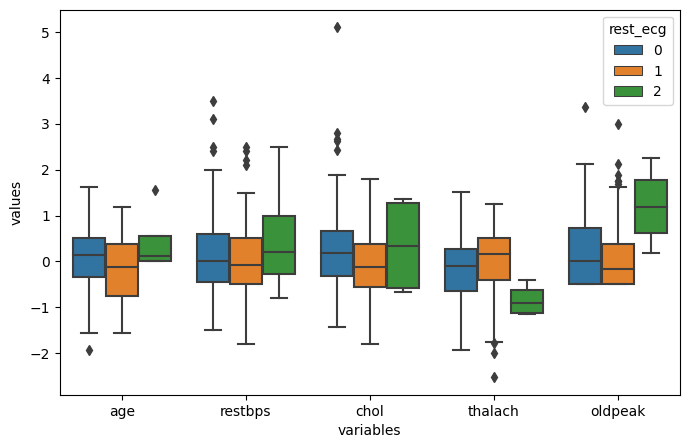

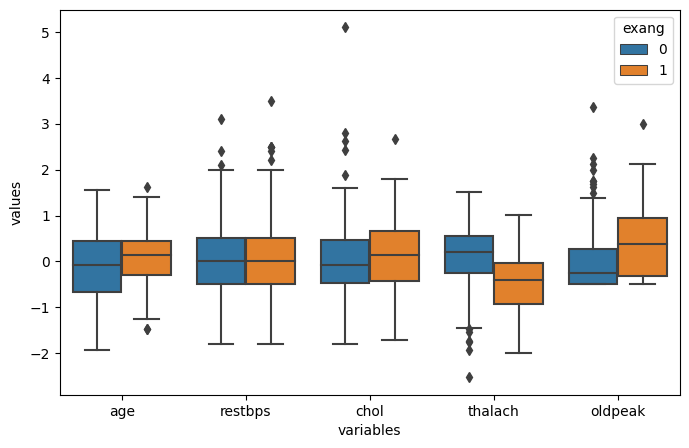

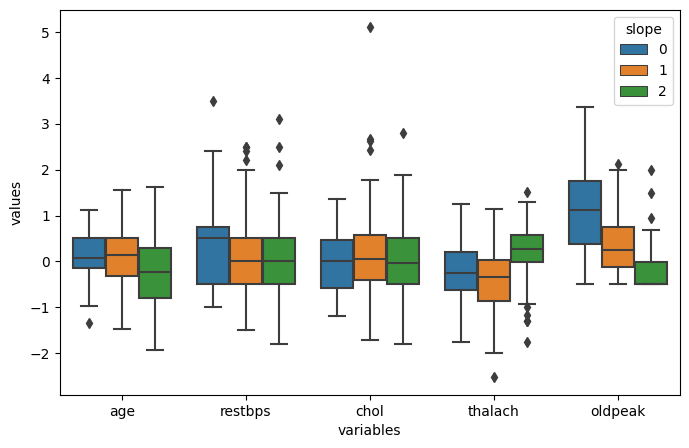

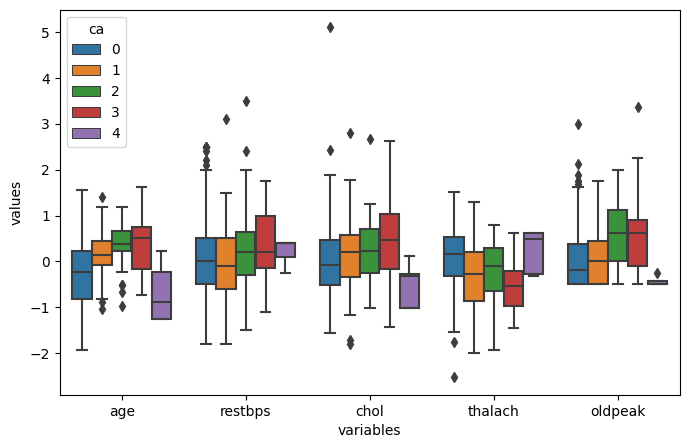

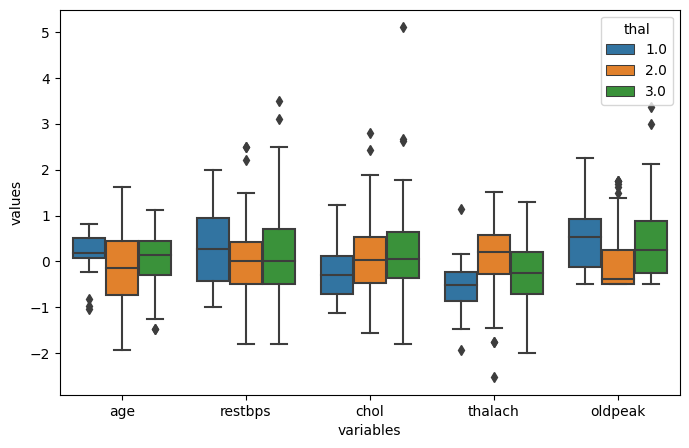

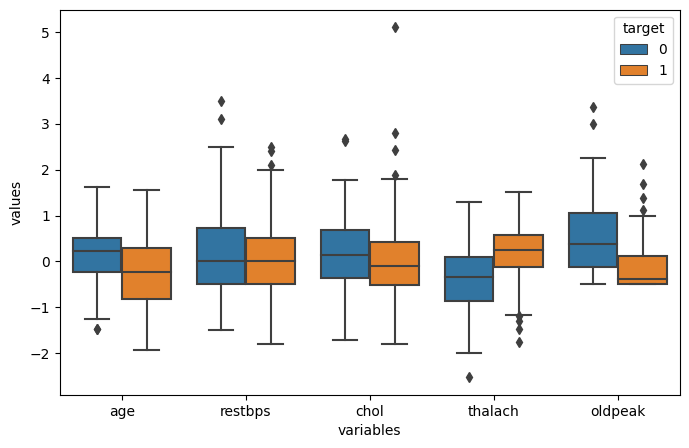

In [24]:
for i in df[cat_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis=1)
    melt_data = pd.melt(df_new, id_vars=i, var_name="variables", value_name="value")

    plt.figure(figsize=(8, 5))
    sns.boxplot(x="variables", y = "value", hue = i, data=melt_data)

    plt.xlabel("variables")
    plt.ylabel("values")

    plt.show()

### Data Analysis
* sex -- not correlated with numeric vars
* cp --  higher corr with the thalach (max. heart rate achieved)
* fasting blood sugar -- no correlation
* resting ECG -- thalach and oldpeak correlate with 3 (ST-T wave abnormally --> T wave inversion or ST elevation/depression by > 05mV)
* exercise induced angina --  correlated to thalach and oldpeak slightly 
* slope --  strongly correlated to oldpeak
* 

## Heat map

* scaled numeric vars

In [27]:
df_scaled.head()

,age,restbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [29]:
df_new2 = pd.concat([df_scaled, df[cat_var]], axis=1)

In [32]:
print(len(df.columns), len(df_new2.columns))

14 14


In [30]:
df_new2.head()

,age,restbps,chol,thalach,oldpeak,sex,cp,fast_bsug,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1.0,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2.0,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2.0,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2.0,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2.0,1


In [33]:
df_new2.corr()

,age,restbps,chol,thalach,oldpeak,sex,cp,fast_bsug,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
restbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fast_bsug,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

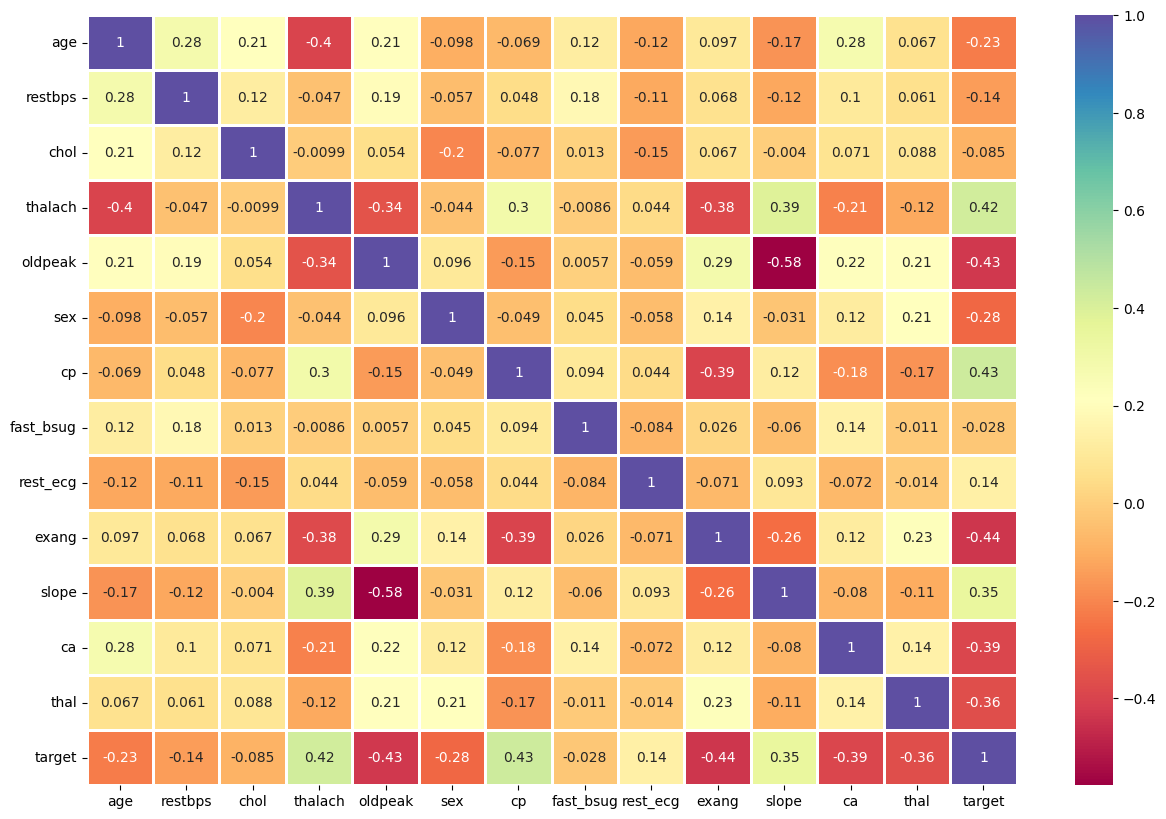

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_new2.corr(), cmap="Spectral", annot=True, linewidths= 2)

### Heat map analysis (positive = direct corr, neg = inverse correlation)
* age -- thalach -0.4, as age goes up max heart rate decreases
* rest blood press, cholesterol --  age highest corr
* thalach -- neg. corr  with age, oldpeak, and exang: max heart rate decreases with age, exerise induce angina, and exercise induce ST depression on ECG
* thalach -- pos. corr. with chest pain and slope
* oldpeak -- neg corr with slope and target
* sex -- low corr with target
* chest pain --  highest corr target
* fasting blood sugar -- slight pos. corr with resting blood pressure
* resting ECG -- slight corr with target
* number of blood vessels --  highest correlation inverse corr with target
* target -- age and sex are have appox. same corr; exercise induced ST depression, exercise induced angina, and number of blood vessels are inversely
* target pos corr -- chest pain and peak exercise ST slope 